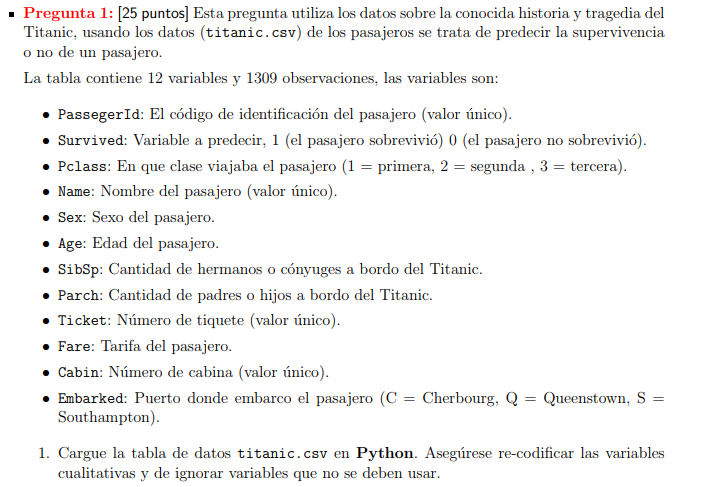

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from   sklearn.model_selection import train_test_split
from   sklearn.neural_network import MLPClassifier
from   sklearn.metrics import confusion_matrix
import math

os.chdir("/Users/Andrey/Desktop/Data-Science-Course/VIII Lecture")

pd.set_option('display.max_rows', 1000)

datos = pd.read_csv('titanic.csv',delimiter=',',decimal=".",index_col=0)

def recodificar(col, nuevo_codigo):
  col_cod = pd.Series(col, copy=True)
  for llave, valor in nuevo_codigo.items():
    col_cod.replace(llave, valor, inplace=True)
  return col_cod

datos["Survived"] = recodificar(datos["Survived"], {0 : 'No', 1: 'Yes'})

datos['Pclass'] = datos['Pclass'].astype('category')
datos['Sex'] = datos['Sex'].astype('category')
datos['Embarked'] = datos['Embarked'].astype('category')

datos["Sex"] = datos["Sex"].cat.codes
datos["Embarked"] = datos["Embarked"].cat.codes
datos["Pclass"] = datos["Pclass"].cat.codes

datos['Sex'] = datos['Sex'].astype('category')
datos['Embarked'] = datos['Embarked'].astype('category')
datos['Pclass'] = datos['Pclass'].astype('category')

del[datos["Name"]]
del[datos["Ticket"]]
del[datos["Cabin"]]

#Imputando la edad con la moda
datos = datos.fillna(np.mean(datos))

print(datos.head())

print(datos.info())

            Survived Pclass Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                          
1                 No      2   1  22.0      1      0   7.2500        2
2                Yes      0   0  38.0      1      0  71.2833        0
3                Yes      2   0  26.0      0      0   7.9250        2
4                Yes      0   0  35.0      1      0  53.1000        2
5                 No      2   1  35.0      0      0   8.0500        2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 8 columns):
Survived    1309 non-null object
Pclass      1309 non-null category
Sex         1309 non-null category
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Fare        1309 non-null float64
Embarked    1309 non-null category
dtypes: category(3), float64(2), int64(2), object(1)
memory usage: 65.6+ KB
None


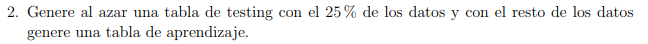

In [5]:
# Se dejan las variables predictorias en una tabla

X = datos.iloc[:,1:] 
print(X.head())

# Se separa las variablea a predecir

y = datos.iloc[:,0:1] 
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

print(X_train.head())

print(X_test.head())

print(y_train.head())

print(y_test.head())

            Pclass Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                 
1                2   1  22.0      1      0   7.2500        2
2                0   0  38.0      1      0  71.2833        0
3                2   0  26.0      0      0   7.9250        2
4                0   0  35.0      1      0  53.1000        2
5                2   1  35.0      0      0   8.0500        2
            Survived
PassengerId         
1                 No
2                Yes
3                Yes
4                Yes
5                 No
            Pclass Sex        Age  SibSp  Parch     Fare Embarked
PassengerId                                                      
748              1   0  30.000000      0      0  13.0000        2
566              2   1  24.000000      2      0  24.1500        2
83               2   0  29.881138      0      0   7.7875        1
568              2   0  29.000000      0      4  21.0750        2
864              2   0  29.881

C:\Users\Andrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


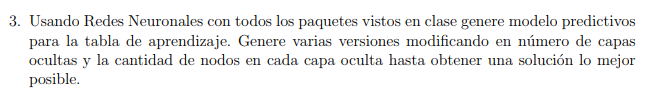

In [8]:
#100 nodos
instancia_red = MLPClassifier(solver='lbfgs', random_state=0)
print(instancia_red)

instancia_red.fit(X_train,y_train)

print("Precisión en Testing: {:.3f}".format(instancia_red.score(X_test, y_test)))

# 50 capas, 50 nodos
instancia_red = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[50, 50])

instancia_red.fit(X_train,y_train)

print("Precisión en Testing: {:.3f}".format(instancia_red.score(X_test, y_test)))


# 500 capas, 500 nodos
instancia_red = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[500, 500])

instancia_red.fit(X_train,y_train)

print("Precisión en Testing: {:.3f}".format(instancia_red.score(X_test, y_test)))


#1000 capas, 1000 nodos

instancia_red = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[1000, 1000])

instancia_red.fit(X_train,y_train)

print("Precisión en Testing: {:.3f}".format(instancia_red.score(X_test, y_test)))

#Mejor resultado

instancia_red = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[20, 20])

instancia_red.fit(X_train,y_train)

print("Precisión en Testing: {:.3f}".format(instancia_red.score(X_test, y_test)))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


C:\Users\Andrey\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión en Testing: 0.872


C:\Users\Andrey\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión en Testing: 0.875


C:\Users\Andrey\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión en Testing: 0.875


C:\Users\Andrey\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión en Testing: 0.875


C:\Users\Andrey\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión en Testing: 0.881


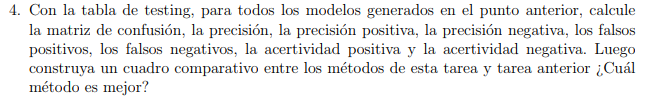

In [9]:

def indices_general(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global = 1 - precision_global
    precision_categoria  = pd.DataFrame(MC.diagonal()/np.sum(MC,axis = 1)).T
    if nombres!=None:
        precision_categoria.columns = nombres
    return {"Matriz de Confusión":MC, 
            "Precisión Global":precision_global, 
            "Error Global":error_global, 
            "Precisión por Categoría":precision_categoria}
    
def precisiones(MC):
    VN = MC[0][0]
    FP = MC[0][1]
    FN = MC[1][0]
    VP = MC[1][1]
    
    return {"Precision Global": (VN + VP) / (VN + FP + FN + VP), 
            "Precisión Positiva": VP / (FN + VP), 
            "Precisión Negativa": VN / (VN + FP), 
            "Precisión Falsos Positivos": FP / (VN + FP),
            "Precisión Falsos Negativos": FN / (VP + FN),
            "Asertividad Positiva": VP / (FP + VP),
            "Asertividad Negativa": VN / (FN + VN)}

def resumenMatrizPrecisiones(instancia, X_testP, y_testP, yP):
    prediccion = instancia.predict(X_testP)
    MC = confusion_matrix(y_testP, prediccion)
    indices = indices_general(MC,list(np.unique(yP)))
    
    for k in indices:
        print("\n%s:\n%s"%(k,str(indices[k])))
    
    #Extrayendo precisiones

    p = precisiones(MC)

    for k in p:
        print("\n%s:\n%s"%(k,str(p[k])))
        
print("Matriz de confusion y precisiones")

resumenMatrizPrecisiones(instancia_red, X_test, y_test, y)

Matriz de confusion y precisiones

Matriz de Confusión:
[[158  22]
 [ 17 131]]

Precisión Global:
0.8810975609756098

Error Global:
0.11890243902439024

Precisión por Categoría:
         No       Yes
0  0.877778  0.885135

Precision Global:
0.8810975609756098

Precisión Positiva:
0.8851351351351351

Precisión Negativa:
0.8777777777777778

Precisión Falsos Positivos:
0.12222222222222222

Precisión Falsos Negativos:
0.11486486486486487

Asertividad Positiva:
0.8562091503267973

Asertividad Negativa:
0.9028571428571428
